<a href="https://colab.research.google.com/github/dkaybee2022/Tesla_GameStop_Webscraping/blob/main/Tesla_Gamestop_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send GET request to the URL
response = requests.get(url)

# Save the response text
html_data = response.text

In [2]:
from bs4 import BeautifulSoup

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')


In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Step 0: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Step 1: Parse HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Step 2: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 3: Find the relevant table (look for Tesla Quarterly Revenue)
tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Step 4–6: Extract rows, get date and revenue columns, and add to DataFrame
data = []  # Create an empty list to store data
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:  # Check if the row has two columns
        date = cols[0].text
        revenue = cols[1].text
        data.append({"Date": date, "Revenue": revenue})  # Append data to the list

# Create a DataFrame from the list of data
tesla_revenue = pd.DataFrame(data)

In [20]:
print(tesla_data.head())

        Date  Revenue
0 2022-09-30  $21,454
1 2022-06-30  $16,934
2 2022-03-31  $18,756
3 2021-12-31  $17,719
4 2021-09-30  $13,757


In [7]:
# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


In [8]:
import yfinance as yf

# Create a Ticker object for GameStop
gamestop = yf.Ticker("GME")


In [9]:
# Get the historical market data for GameStop
gme_data = gamestop.history(period="max")


In [10]:
import yfinance as yf

# Question 3: Create a Ticker object for GameStop
gamestop = yf.Ticker("GME")

# Extract historical stock data for the maximum period
gme_data = gamestop.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [22]:
print(gme_data.tail())

                          Date       Open       High        Low      Close  \
5827 2025-04-10 00:00:00-04:00  25.000000  26.200001  24.410000  25.020000   
5828 2025-04-11 00:00:00-04:00  25.500000  26.440001  25.250000  26.400000   
5829 2025-04-14 00:00:00-04:00  26.660000  27.180000  25.680000  26.980000   
5830 2025-04-15 00:00:00-04:00  26.879999  27.379999  26.620001  26.700001   
5831 2025-04-16 00:00:00-04:00  26.450001  26.660000  25.719999  26.250000   

        Volume  Dividends  Stock Splits  
5827  11545400        0.0           0.0  
5828  10984100        0.0           0.0  
5829  10628400        0.0           0.0  
5830   6738100        0.0           0.0  
5831   6254500        0.0           0.0  


In [11]:
import requests

# URL of the GameStop revenue webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the response text
html_data_2 = response.text


In [12]:
from bs4 import BeautifulSoup

# Parse the HTML data with html5lib
soup_2 = BeautifulSoup(html_data_2, 'html5lib')


In [15]:
import pandas as pd

# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find all tables
tables = soup_2.find_all("table") # Changed soup2 to soup_2

# Loop through to find the correct table
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract rows and populate DataFrame
data = []  # Create an empty list to store the data
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Only append non-empty rows
            data.append({"Date": date, "Revenue": revenue})

# Create the DataFrame outside the loop using pd.concat
gme_revenue = pd.concat([gme_revenue, pd.DataFrame(data)], ignore_index=True)

# Display the first few rows
print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


In [16]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


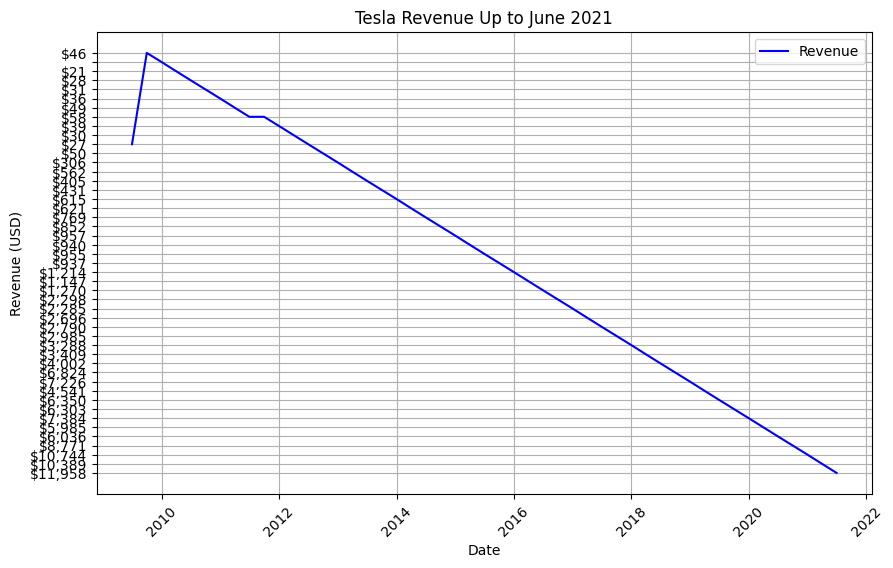

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming tesla_revenue contains the Tesla revenue data
tesla_data = tesla_revenue  # Assign tesla_revenue to tesla_data

# Filter the Tesla data up until June 2021
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])  # Convert 'Date' column to datetime
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Graph the Tesla stock data using `make_graph`
def make_graph(data, title):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Revenue'], label='Revenue', color='b') # Assuming Revenue is what you want to plot
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)') # Changed ylabel to Revenue
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Call the function with the filtered data and a title
make_graph(tesla_data_filtered, "Tesla Revenue Up to June 2021") # Changed title

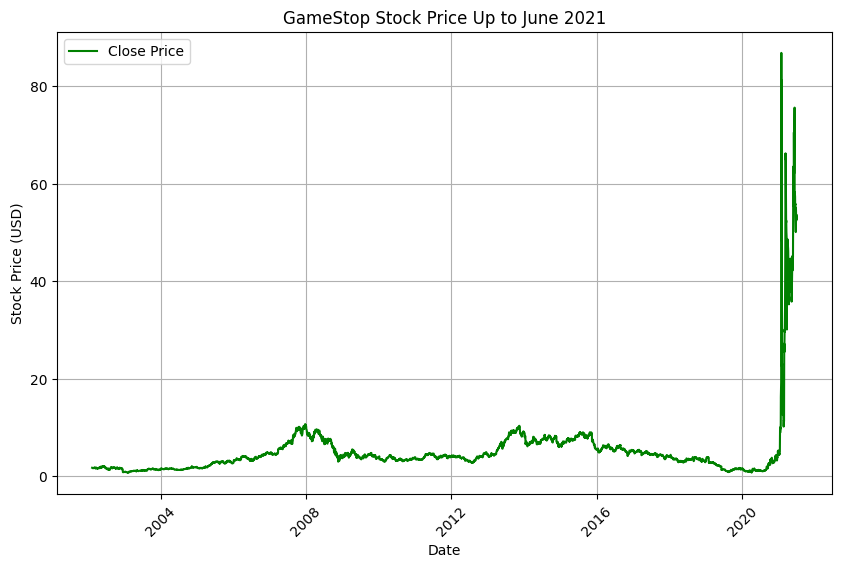

In [19]:
import matplotlib.pyplot as plt

# Filter the GameStop data up until June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Graph the GameStop stock data using `make_graph`
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='g')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.title(f'{title} Stock Price Up to June 2021')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Call the function with the filtered GameStop stock data and a title
make_graph(gme_data_filtered, gme_revenue, 'GameStop')
